In [8]:
!pip install pydub
!pip install tensorflow-datasets

In [10]:
import tensorflow_datasets as tfds  # Import the module and give it the alias 'tfds'
ds_splits, ds_info = tfds.load(
    "crema_d",
    split=["train", "test"],    # you can also do ["train", "validation", "test"]
    with_info=True,
    as_supervised=True,         # returns (audio_waveform, label) pairs
    shuffle_files=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyboardInterrupt: 

In [ ]:

for audio, label in ds_splits[0].take(1):
    print("Audio shape:", audio.shape)
    print("Label (int):", label.numpy())

In [ ]:
# ←– Update these paths to where you cloned CREMA-D
audio_dir = os.path.expanduser("~/.datasets/CREMA-D/AudioWAV")
# Update the path below if the Video directory is not at this location.
# Get the correct location by running !ls ~/.datasets/CREMA-D
# and seeing where the Video directory is located
video_dir = os.path.expanduser("~/.datasets/CREMA-D/Video")

In [ ]:
   !ls ~/.datasets/CREMA-D

In [11]:
# 1. Clone the CREMA-D dataset (run once in your terminal or notebook)
#    Replace ~/.datasets with wherever you want to store it
!git clone https://github.com/CheyneyComputerScience/CREMA-D.git
# 2. In your Python notebook/script:
import os
from IPython.display import Audio, Video, display

# ←– Update these paths to where you cloned CREMA-D
audio_dir = os.path.expanduser("~/.datasets/CREMA-D/AudioWAV")
# The Video directory is actually located in 'VideoFlash'
# based on the output from previous !ls command
video_dir = os.path.expanduser("~/.datasets/CREMA-D/VideoFlash") # Changed to 'VideoFlash'

# 3. Pick the first example
audio_file = sorted(os.listdir(audio_dir))[5]
video_file = sorted(os.listdir(video_dir))[5]

audio_path = os.path.join(audio_dir, audio_file)
video_path = os.path.join(video_dir, video_file)

print("▶ Playing audio:", audio_file)
display(Audio(audio_path, autoplay=False))    # shows an HTML audio player

print("▶ Showing video:", video_file)
display(Video(video_path, embed=True, width=400))  # shows an HTML video player

# 4. (Optional) Inspect metadata
print("Audio sample rate & shape can be inferred automatically by IPython.display.")
print("Video resolution & length will appear in the player’s controls.")

Cloning into 'CREMA-D'...
remote: Enumerating objects: 22518, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 22518 (delta 32), reused 57 (delta 13), pack-reused 22428 (from 1)
Receiving objects: 100% (22518/22518), 14.82 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Updating files: 100% (22342/22342), done.
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'


Exiting because of "interrupt" signal.
^C


FileNotFoundError: [Errno 2] No such file or directory: '/root/.datasets/CREMA-D/AudioWAV'

In [12]:
!apt-get update && apt-get install -y ffmpeg

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,384 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,692 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,788 kB]
Hit:13 http://archive.ubuntu.com/ubu

In [13]:
import os
import subprocess

video_dir = os.path.expanduser("/content/CREMA-D/VideoFlash")  # Your video directory
output_dir = os.path.expanduser("/content/CREMA-D/VideoMP4")  # Output directory for MP4s
os.makedirs(output_dir, exist_ok=True)  # Make the directory if it does not exist

for filename in os.listdir(video_dir):
    if filename.endswith(".flv"):
        input_path = os.path.join(video_dir, filename)
        output_path = os.path.join(output_dir, filename[:-4] + ".mp4")  # Change extension to .mp4
        subprocess.run(["ffmpeg", "-i", input_path, output_path])  # Run the ffmpeg command
        print(f"Converted {filename} to {filename[:-4] + '.mp4'}")  # Alert user

Converted 1052_TSI_NEU_XX.flv to 1052_TSI_NEU_XX.mp4
Converted 1015_IOM_NEU_XX.flv to 1015_IOM_NEU_XX.mp4
Converted 1038_TSI_DIS_XX.flv to 1038_TSI_DIS_XX.mp4
Converted 1029_IWW_FEA_XX.flv to 1029_IWW_FEA_XX.mp4
Converted 1056_IWL_ANG_XX.flv to 1056_IWL_ANG_XX.mp4
Converted 1057_IEO_NEU_XX.flv to 1057_IEO_NEU_XX.mp4


KeyboardInterrupt: 

In [ ]:
from google.colab import files
import shutil

# Create a zip archive of the folder
shutil.make_archive('AudioWAV', 'zip', '/content/CREMA-D/AudioWAV')

# Download the zip archive
files.download('AudioWAV.zip')

In [14]:
!pip install librosa opencv-python-headless

In [15]:
import os
import numpy as np
import librosa
import cv2
from glob import glob

AUDIO_DIR = "/content/CREMA-D/AudioWAV"
VIDEO_DIR = "/content/CREMA-D/VideoFlash"

In [16]:
def preprocess_audio(file_path, sr=16000, duration=3.0, n_mels=64):
    y, orig_sr = librosa.load(file_path, sr=None)
    if orig_sr != sr:
        y = librosa.resample(y, orig_sr, sr)
    max_len = int(sr * duration)
    y = np.pad(y, (0, max_len - len(y)), mode='constant') if len(y) < max_len else y[:max_len]
    # The 'y' argument should be provided as a keyword argument, not positional
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_mel = librosa.power_to_db(mel, ref=np.max)
    log_mel_norm = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())
    log_mel_norm = log_mel_norm[..., np.newaxis]  # Add a new axis at the end
    return log_mel_norm.astype(np.float32)

In [17]:
def preprocess_video(file_path, num_frames=16, frame_size=(224, 224)):
    cap = cv2.VideoCapture(file_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    idxs = np.linspace(0, total-1, num_frames).astype(int)
    frames = []
    for i in idxs:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) / 255.0
        frames.append(frame.astype(np.float32))
    cap.release()
    if len(frames) < num_frames:
        pad = np.zeros((frame_size[1], frame_size[0], 3), dtype=np.float32)
        frames += [pad] * (num_frames - len(frames))
    return np.stack(frames)

In [18]:
audio_files = glob(os.path.join(AUDIO_DIR, "*.wav"))
video_files = glob(os.path.join(VIDEO_DIR, "*.flv"))

if audio_files and video_files:
    spec = preprocess_audio(audio_files[0])
    vid  = preprocess_video(video_files[0])
    print("Log-Mel Spectrogram shape:", spec.shape)
    print("Video frames shape:", vid.shape)
else:
    print("❗ Update AUDIO_DIR and VIDEO_DIR to point to your CREMA-D folders")

Log-Mel Spectrogram shape: (64, 94, 1)
Video frames shape: (16, 224, 224, 3)


In [19]:
EMOTION_LABELS = {
    "ANG": "Angry",
    "DIS": "Disgust",
    "FEA": "Fear",
    "HAP": "Happy",
    "NEU": "Neutral",
    "SAD": "Sad",
    "SUR": "Surprise"
}


In [20]:
from collections import Counter
import os

# Assuming you have this structure: data/{Emotion}/{video|audio}_*.ext
all_audio_files = glob("/content/CREMA-D/AudioWAV/*.wav")
all_video_files = glob("/content/CREMA-D/VideoFlash/*.flv")

# Count samples per emotion from filenames or metadata
labels = [f.split("_")[2] for f in all_audio_files]  # CREMA-D labels are in filenames
label_counts = Counter(labels)

print("Number of audio samples:", len(all_audio_files))
print("Number of video samples:", len(all_video_files))
print("Emotion distribution:", label_counts)


Number of audio samples: 7442
Number of video samples: 4970
Emotion distribution: Counter({'FEA': 1271, 'ANG': 1271, 'SAD': 1271, 'HAP': 1271, 'DIS': 1271, 'NEU': 1087})


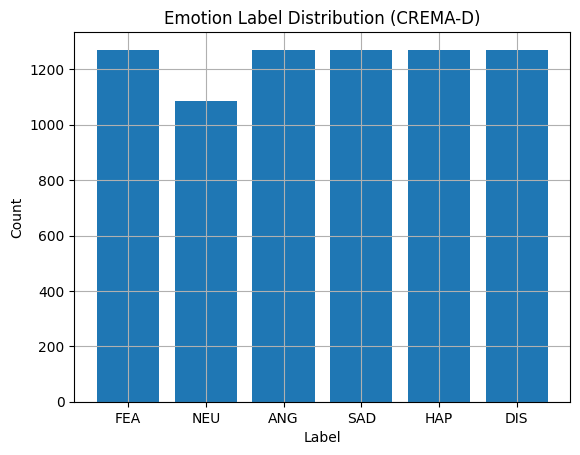

In [21]:
import matplotlib.pyplot as plt

plt.bar(label_counts.keys(), label_counts.values())
plt.title("Emotion Label Distribution (CREMA-D)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [22]:
from glob import glob
import os

AUDIO_DIR = "/content/CREMA-D/AudioWAV"
all_audio_files = glob(os.path.join(AUDIO_DIR, "*.wav"))

# Get one file for each emotion
def get_sample_path(emotion_code):
    for f in all_audio_files:
        if f"_{emotion_code}_" in os.path.basename(f):
            return f
    return None

path_angry = get_sample_path("ANG")
path_happy = get_sample_path("HAP")


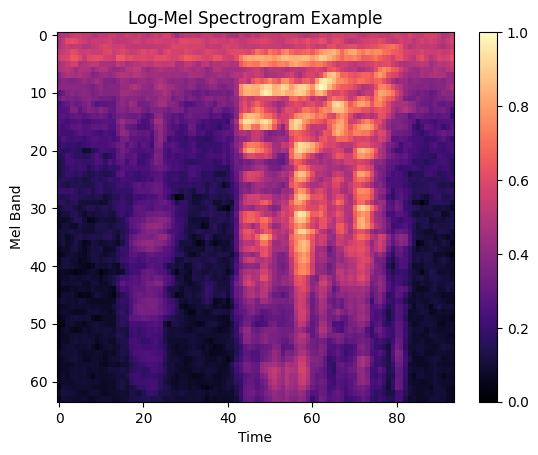

In [23]:
plt.imshow(spec, aspect='auto', cmap='magma')
plt.title("Log-Mel Spectrogram Example")
plt.xlabel("Time")
plt.ylabel("Mel Band")
plt.colorbar()
plt.show()

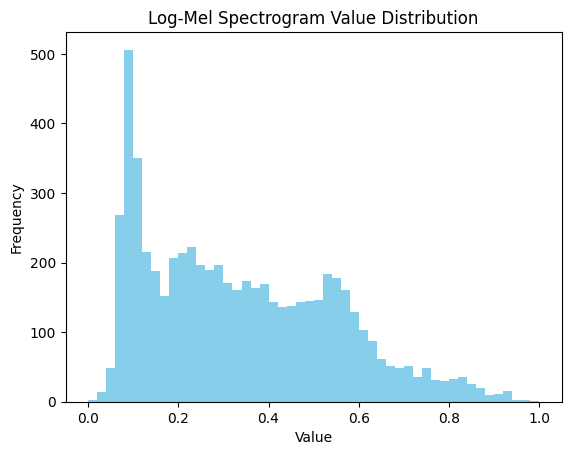

Spec stats → min: 0.00, max: 1.00, mean: 0.34


In [24]:
plt.hist(spec.flatten(), bins=50, color='skyblue')
plt.title("Log-Mel Spectrogram Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print(f"Spec stats → min: {spec.min():.2f}, max: {spec.max():.2f}, mean: {spec.mean():.2f}")


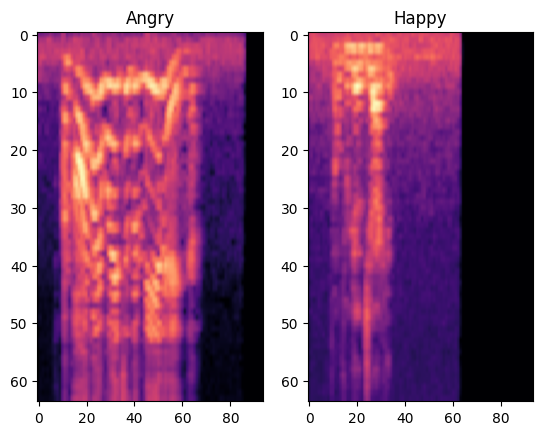

In [25]:
spec_angry = preprocess_audio(path_angry)
spec_happy = preprocess_audio(path_happy)

plt.subplot(1, 2, 1)
plt.imshow(spec_angry, aspect='auto', cmap='magma')
plt.title("Angry")

plt.subplot(1, 2, 2)
plt.imshow(spec_happy, aspect='auto', cmap='magma')
plt.title("Happy")
plt.show()


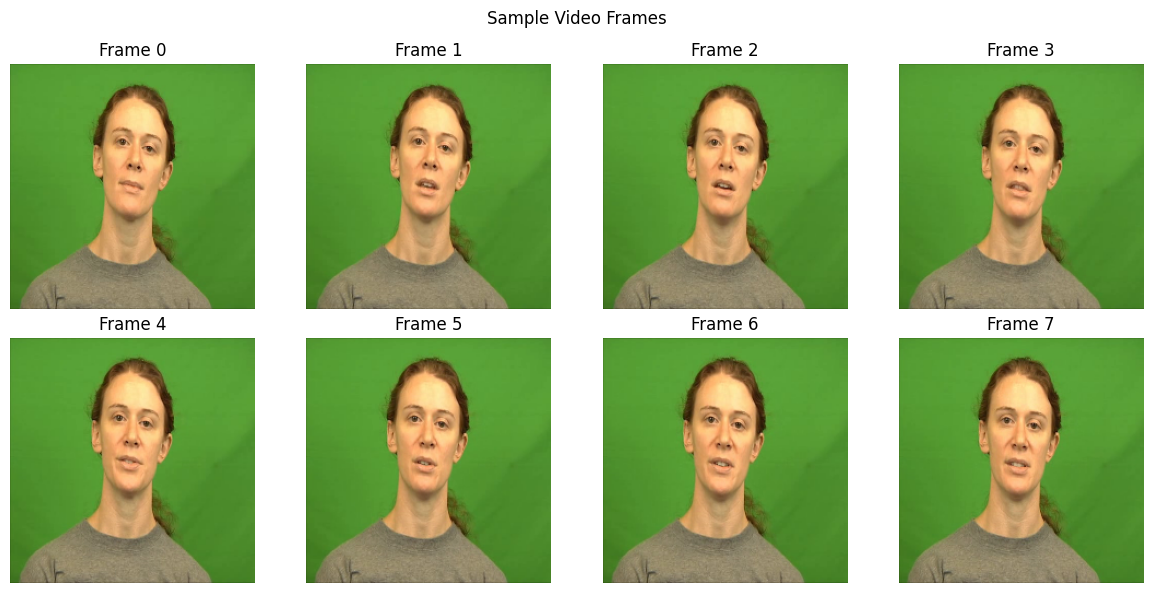

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(vid[i])
    ax.set_title(f"Frame {i}")
    ax.axis('off')
plt.suptitle("Sample Video Frames")
plt.tight_layout()
plt.show()


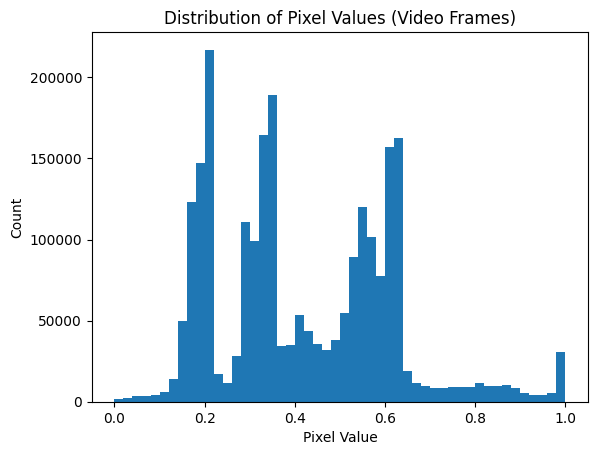

Video mean: 0.42, std: 0.20


In [27]:
plt.hist(vid.flatten(), bins=50)
plt.title("Distribution of Pixel Values (Video Frames)")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

print(f"Video mean: {vid.mean():.2f}, std: {vid.std():.2f}")


<ipython-input-16-dd8df591c58e>:10: RuntimeWarning: invalid value encountered in divide
  log_mel_norm = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())


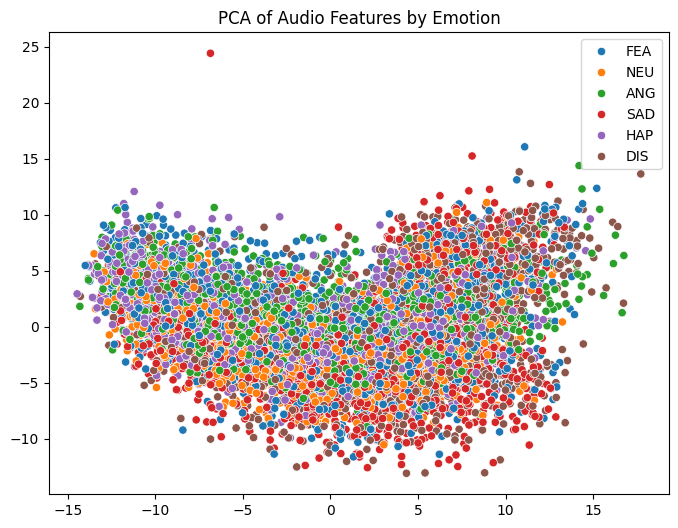

In [30]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np # Make sure numpy is imported

# Step 1: Extract features for all audio samples (mean over time axis of spectrogram)
def extract_audio_features(path):
    spec = preprocess_audio(path)
    # Flatten the spectrogram to get a 1D feature vector for each audio sample
    features = spec.flatten() # Flatten the 3D spectrogram to 1D
    # Check for NaN and replace with 0 if found
    features = np.nan_to_num(features, nan=0.0)  # Replace NaN with 0
    return features

X = []
y = []
for path in all_audio_files:
    label = path.split("_")[2]  # e.g., SAD, HAP
    X.append(extract_audio_features(path))
    y.append(label)

# Convert the list of 1D feature vectors to a 2D array
X = np.array(X)  # Convert list of arrays to a single 2D array

# Step 2: Reduce dimensionality
X_pca = PCA(n_components=2).fit_transform(X)

# Step 3: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10')
plt.title("PCA of Audio Features by Emotion")
plt.show()

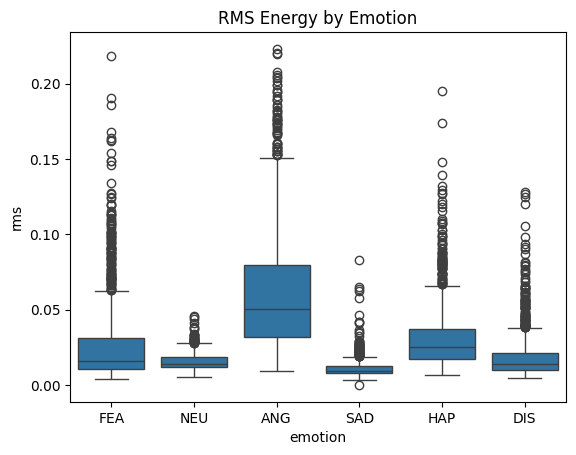

In [31]:
def get_rms_energy(path):
    y, sr = librosa.load(path)
    return librosa.feature.rms(y=y).mean()

import pandas as pd

emotion_stats = []
for path in all_audio_files:
    emotion = path.split("_")[2]
    rms = get_rms_energy(path)
    emotion_stats.append((emotion, rms))

df = pd.DataFrame(emotion_stats, columns=["emotion", "rms"])
sns.boxplot(data=df, x="emotion", y="rms")
plt.title("RMS Energy by Emotion")
plt.show()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1

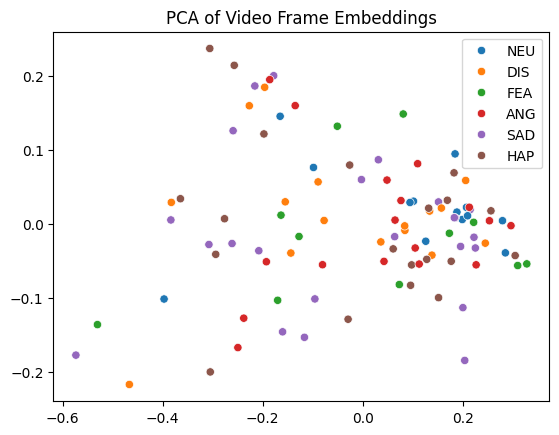

In [32]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = MobileNetV2(include_top=False, pooling='avg', input_shape=(224, 224, 3))

def get_frame_embedding(frame):
    x = preprocess_input(np.expand_dims(frame, 0))
    return model.predict(x)[0]

video_embeddings = []
labels = []
for path in video_files[:100]:
    emotion = path.split("_")[2]
    frames = preprocess_video(path)
    emb = get_frame_embedding(frames[8])
    video_embeddings.append(emb)
    labels.append(emotion)

X_pca = PCA(n_components=2).fit_transform(video_embeddings)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels)
plt.title("PCA of Video Frame Embeddings")
plt.show()


In [33]:
# Phase 2: Model Implementation for Violence Detection
# Based on the paper: "Realtime Violence Detection in Surveillance Videos using Deep Learning Approach"

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Concatenate, TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

# Define the paths to your processed data
PROCESSED_DATA_DIR = "/content/processed_data"
# Make directory if it doesn't exist
import os
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# 1. Create a function to process and prepare data for training
def prepare_data(audio_files, video_files, labels, test_size=0.2, val_size=0.1):
    """
    Process audio and video files to generate features and split into train/val/test sets

    Args:
        audio_files (list): List of audio file paths
        video_files (list): List of video file paths
        labels (list): List of labels (0 for non-violent, 1 for violent)
        test_size (float): Proportion of data to use for testing
        val_size (float): Proportion of training data to use for validation

    Returns:
        Tuple of (X_audio_train, X_video_train, y_train, X_audio_val, X_video_val, y_val, X_audio_test, X_video_test, y_test)
    """
    # Process audio files
    audio_features = []
    for audio_file in audio_files:
        # Extract log-mel spectrogram features as we did in preprocessing
        audio_feature = preprocess_audio(audio_file)
        audio_features.append(audio_feature)

    audio_features = np.array(audio_features)

    # Process video files
    video_features = []
    for video_file in video_files:
        # Extract frames as we did in preprocessing
        video_feature = preprocess_video(video_file)
        video_features.append(video_feature)

    video_features = np.array(video_features)

    # Convert labels to numpy array
    labels = np.array(labels)

    # Split into train+val and test sets
    X_audio_temp, X_audio_test, X_video_temp, X_video_test, y_temp, y_test = train_test_split(
        audio_features, video_features, labels, test_size=test_size, random_state=42, stratify=labels
    )

    # Split train+val into train and val sets
    val_size_adjusted = val_size / (1 - test_size)
    X_audio_train, X_audio_val, X_video_train, X_video_val, y_train, y_val = train_test_split(
        X_audio_temp, X_video_temp, y_temp, test_size=val_size_adjusted, random_state=42, stratify=y_temp
    )

    # Save processed data
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_audio_train.npy"), X_audio_train)
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_video_train.npy"), X_video_train)
    np.save(os.path.join(PROCESSED_DATA_DIR, "y_train.npy"), y_train)
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_audio_val.npy"), X_audio_val)
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_video_val.npy"), X_video_val)
    np.save(os.path.join(PROCESSED_DATA_DIR, "y_val.npy"), y_val)
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_audio_test.npy"), X_audio_test)
    np.save(os.path.join(PROCESSED_DATA_DIR, "X_video_test.npy"), X_video_test)
    np.save(os.path.join(PROCESSED_DATA_DIR, "y_test.npy"), y_test)

    return (X_audio_train, X_video_train, y_train,
            X_audio_val, X_video_val, y_val,
            X_audio_test, X_video_test, y_test)

# 2. Build the audio feature extraction module
def build_audio_model(input_shape):
    """
    Build the audio processing part of the model

    Args:
        input_shape (tuple): Shape of the audio input (e.g., (64, 44, 1) for mel spectrogram)

    Returns:
        model: Audio feature extraction model
    """
    # Create a model similar to the one described in the paper
    # using CNN layers followed by LSTM for temporal modeling

    input_audio = Input(shape=input_shape)

    # CNN layers for feature extraction
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_audio)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Reshape for LSTM
    x = TimeDistributed(Flatten())(x)

    # LSTM layers
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(128)(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    model = Model(inputs=input_audio, outputs=x, name='audio_model')
    return model

# 3. Build the video feature extraction module
def build_video_model(input_shape):
    """
    Build the video processing part of the model

    Args:
        input_shape (tuple): Shape of the video input (e.g., (16, 224, 224, 3) for 16 frames)

    Returns:
        model: Video feature extraction model
    """
    # Using a pre-trained model (InceptionV3 or VGG16) as feature extractor
    # as described in the paper

    # Option 1: Use InceptionV3 as backbone
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape[1:])

    # Freeze the base model
    base_model.trainable = False

    input_video = Input(shape=input_shape)

    # Apply the base model to each frame using TimeDistributed
    x = TimeDistributed(base_model)(input_video)
    x = TimeDistributed(GlobalAveragePooling2D())(x)

    # LSTM for temporal modeling
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(128)(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    model = Model(inputs=input_video, outputs=x, name='video_model')
    return model

# 4. Build the full multimodal model by combining audio and video
def build_multimodal_model(audio_shape, video_shape):
    """
    Build the full multimodal model by combining audio and video models

    Args:
        audio_shape (tuple): Shape of the audio input
        video_shape (tuple): Shape of the video input

    Returns:
        model: Complete multimodal model for violence detection
    """
    # Get the individual models
    audio_model = build_audio_model(audio_shape)
    video_model = build_video_model(video_shape)

    # Create inputs
    input_audio = Input(shape=audio_shape)
    input_video = Input(shape=video_shape)

    # Get embeddings from each model
    audio_features = audio_model(input_audio)
    video_features = video_model(input_video)

    # Concatenate features from both modalities
    combined = Concatenate()([audio_features, video_features])

    # Final classification layers
    x = Dense(256, activation='relu')(combined)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    # Create and compile the model
    model = Model(inputs=[input_audio, input_video], outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# 5. Function to train the model
def train_model(model, X_audio_train, X_video_train, y_train, X_audio_val, X_video_val, y_val, epochs=30, batch_size=32):
    """
    Train the multimodal model

    Args:
        model: The compiled model
        X_audio_train, X_video_train, y_train: Training data
        X_audio_val, X_video_val, y_val: Validation data
        epochs (int): Number of epochs to train
        batch_size (int): Batch size for training

    Returns:
        history: Training history
    """
    # Define callbacks
    checkpoint = ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # Train the model
    history = model.fit(
        [X_audio_train, X_video_train],
        y_train,
        validation_data=([X_audio_val, X_video_val], y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[checkpoint, early_stopping]
    )

    return history

# 6. Function to evaluate the model
def evaluate_model(model, X_audio_test, X_video_test, y_test):
    """
    Evaluate the model on test dataevaluate_model

    Args:
        model: Trained model
        X_audio_test, X_video_test, y_test: Test data

    Returns:
        results: Evaluation metrics
    """
    results = model.evaluate([X_audio_test, X_video_test], y_test, verbose=1)
    print(f"Test Loss: {results[0]}")
    print(f"Test Accuracy: {results[1]}")

    # Make predictions
    y_pred = model.predict([X_audio_test, X_video_test])
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate additional metrics
    from sklearn.metrics import classification_report, confusion_matrix

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_binary))

    return results

# 7. Function to visualize model performance
def visualize_performance(history):
    """
    Visualize the training and validation performance

    Args:
        history: Training history object
    """
    import matplotlib.pyplot as plt

    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Here's how you would use these functions to implement the full pipeline
# This is a demonstration and would need to be adapted to your specific dataset

def main():
    # 1. Get the file paths and labels
    # Example: Create lists of audio files, video files, and corresponding labels
    # You would need to adapt this to your actual dataset

    # Extract labels from filenames (example for CREMA-D)
    all_audio_files = glob(os.path.join(AUDIO_DIR, "*.wav"))
    all_video_files = glob(os.path.join(VIDEO_DIR, "*.flv"))

    # Example: extract labels based on your dataset
    # For violence detection, you would need to define what constitutes a "violent" video
    # This is just a placeholder - replace with your actual labeling logic

    audio_files = []
    video_files = []
    labels = []

    # Example logic - replace with your actual dataset setup
    for audio_file in all_audio_files[:100]:  # Limiting to 100 samples for demonstration
        base_name = os.path.basename(audio_file)[:-4]  # Remove .wav extension
        video_file = os.path.join(VIDEO_DIR, f"{base_name}.flv")

        if os.path.exists(video_file):
            # Example: label as violent if the filename contains "ANG" (angry) or "FEA" (fear)
            # In a real dataset, you would have actual violence labels
            if "_ANG_" in base_name or "_FEA_" in base_name:
                label = 1  # Violent
            else:
                label = 0  # Non-violent

            audio_files.append(audio_file)
            video_files.append(video_file)
            labels.append(label)

    print(f"Total samples: {len(labels)}")
    print(f"Violent samples: {sum(labels)}")
    print(f"Non-violent samples: {len(labels) - sum(labels)}")

    # 2. Prepare the data
    X_audio_train, X_video_train, y_train, X_audio_val, X_video_val, y_val, X_audio_test, X_video_test, y_test = prepare_data(
        audio_files, video_files, labels
    )

    # 3. Define input shapes for the model
    audio_shape = X_audio_train[0].shape
    video_shape = X_video_train[0].shape

    print(f"Audio shape: {audio_shape}")
    print(f"Video shape: {video_shape}")

    # 4. Build the model
    model = build_multimodal_model(audio_shape, video_shape)
    model.summary()

    # 5. Train the model
    history = train_model(
        model,
        X_audio_train, X_video_train, y_train,
        X_audio_val, X_video_val, y_val,
        epochs=30,
        batch_size=32
    )

    # 6. Evaluate the model
    evaluate_model(model, X_audio_test, X_video_test, y_test)

    # 7. Visualize performance
    visualize_performance(history)

    # 8. Save the model
    model.save('violence_detection_model.h5')
    print("Model saved successfully.")

Total samples: 57
Violent samples: 16
Non-violent samples: 41
Audio shape: (64, 94, 1)
Video shape: (16, 224, 224, 3)
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 94, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 16, 224,   │          0 │ -                 │
│ (InputLayer)        │ 224, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ audio_model         │ (None, 128)       │  2,175,360 │ input_layer_4[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ video_model         │ (None, 128)       │ 24,376,736 │ input_layer_5[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256)       │          0 │ audio_model[0][0… │
│ (Concatenate)       │                   │            │ video_model[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,650,913 (101.67 MB)

 Trainable params: 4,848,129 (18.49 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7027 - loss: 0.6490    
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 175s 52s/step - accuracy: 0.7078 - loss: 0.6468 - val_accuracy: 0.6667 - val_loss: 0.6459
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7183 - loss: 0.6480
Epoch 2: val_accuracy did not improve from 0.66667
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7182 - loss: 0.6513 - val_accuracy: 0.6667 - val_loss: 0.6462
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6899 - loss: 0.6620
Epoch 3: val_accuracy did not improve from 0.66667
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6907 - loss: 0.6597 - val_accuracy: 0.6667 - val_loss: 0.6414
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7183 - loss: 0.6384
Epoch 4: val_accuracy did not improve from 0.66667
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 845ms/step - accuracy: 0.7182 - loss: 0.6344 - val_accuracy: 0.6667 - val_loss: 0.6523
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.6615 - loss: 0.6736
Epoch 5: val_accuracy did not improve from 0.66667
2/2 ━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


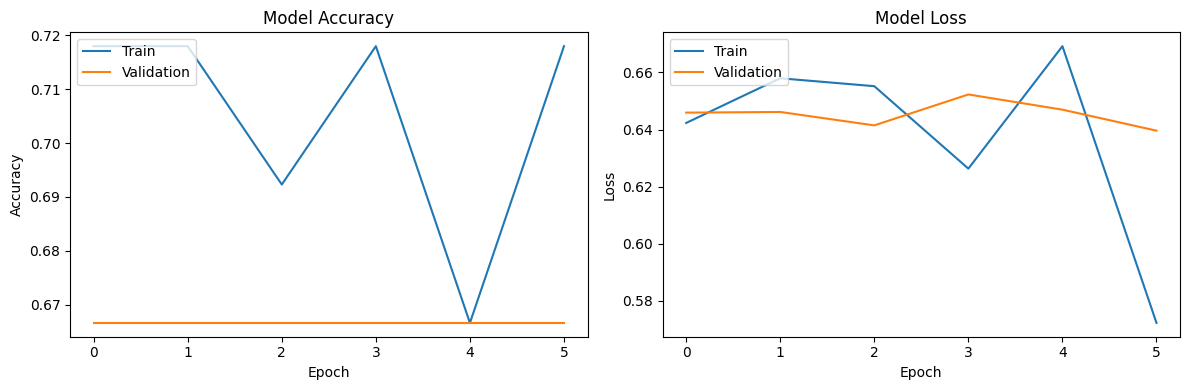

Model saved successfully.


In [34]:
 main()

In [42]:
!pip install lime
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.3 MB/s eta 0:00:00


In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_image
from tensorflow.keras.models import load_model
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import cv2
from IPython.display import display, Image, HTML

In [44]:
model = load_model('violence_detection_model.h5')

# Load your test data (assuming you've already processed it)
X_audio_test = np.load(os.path.join(PROCESSED_DATA_DIR, "X_audio_test.npy"))
X_video_test = np.load(os.path.join(PROCESSED_DATA_DIR, "X_video_test.npy"))
y_test = np.load(os.path.join(PROCESSED_DATA_DIR, "y_test.npy"))

In [45]:
def get_intermediate_models(model):
    """
    Create models that output intermediate activations
    """
    # Extract the audio branch
    audio_input = model.input[0]
    audio_model = model.get_layer('audio_model')
    audio_output = audio_model(audio_input)

    # Extract the video branch
    video_input = model.input[1]
    video_model = model.get_layer('video_model')
    video_output = video_model(video_input)

    # Create models for each branch
    audio_feature_model = tf.keras.Model(inputs=audio_input, outputs=audio_output)
    video_feature_model = tf.keras.Model(inputs=video_input, outputs=video_output)

    return audio_feature_model, video_feature_model

audio_feature_model, video_feature_model = get_intermediate_models(model)

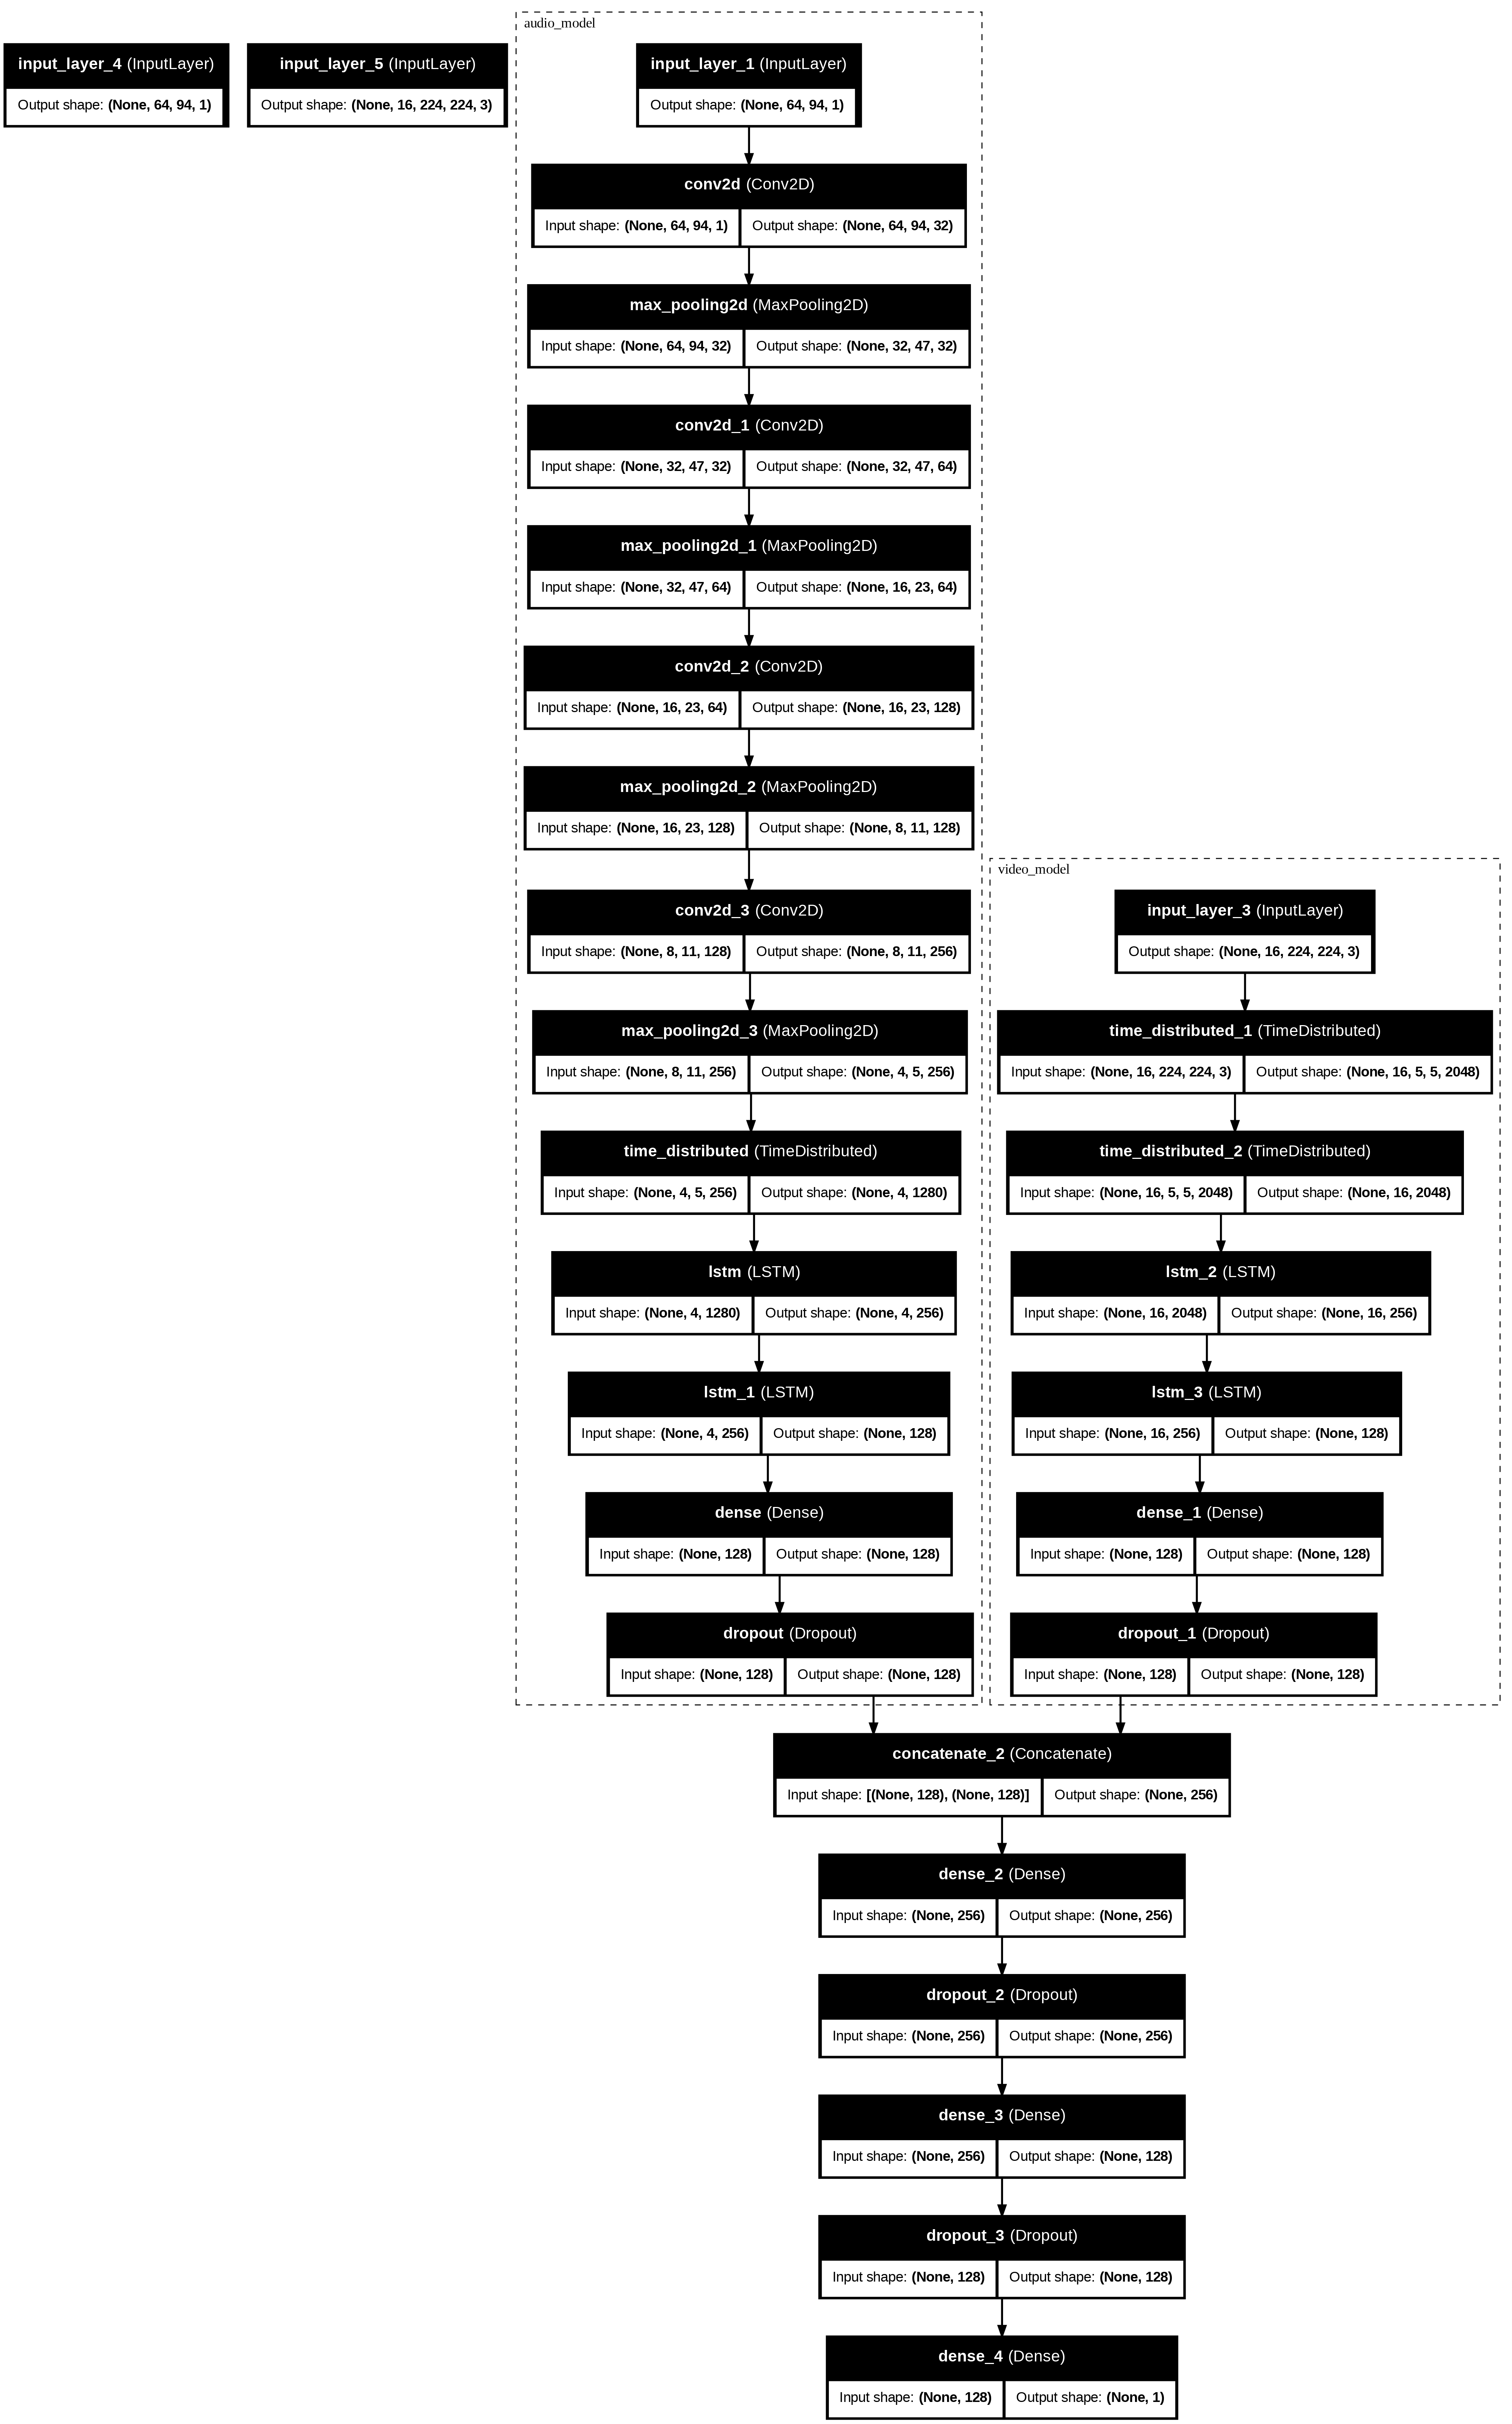

In [46]:
# 3. Visualize model architecture
tf.keras.utils.plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True
)

display(Image('model_architecture.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


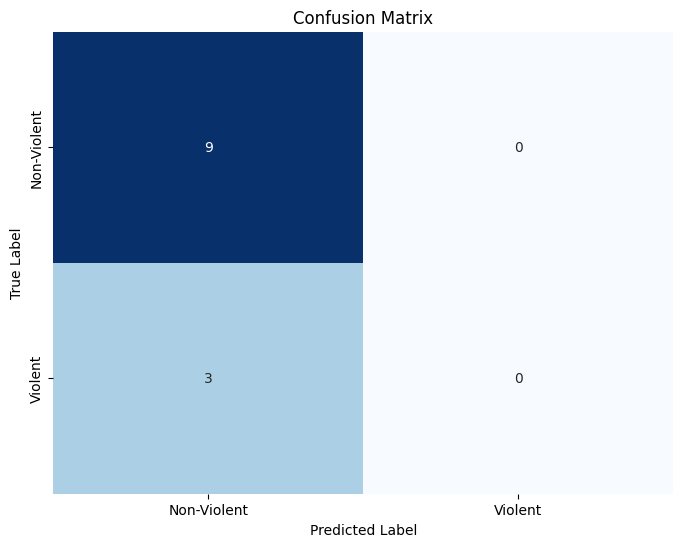


Classification Report:
              precision    recall  f1-score   support

 Non-Violent       0.75      1.00      0.86         9
     Violent       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# 4. Analyze model predictions and performance
# Make predictions on the test set
y_pred = model.predict([X_audio_test, X_video_test])
y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Non-Violent', 'Violent'])
plt.yticks([0.5, 1.5], ['Non-Violent', 'Violent'])
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Non-Violent', 'Violent']))


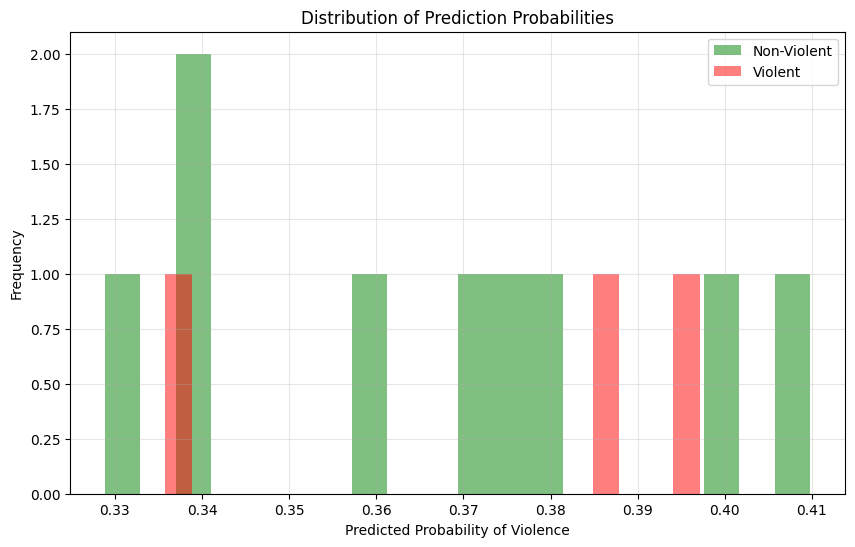

In [49]:
# 5. Analyze prediction confidence
plt.figure(figsize=(10, 6))
# Plot histogram of prediction probabilities
plt.hist(y_pred[y_test == 0], bins=20, alpha=0.5, label='Non-Violent', color='green')
plt.hist(y_pred[y_test == 1], bins=20, alpha=0.5, label='Violent', color='red')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Predicted Probability of Violence')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [50]:
def show_sample_predictions(X_audio, X_video, y_true, y_pred, indices):
    """Display sample predictions with confidence"""
    for i in indices:
        print(f"Sample {i}:")
        print(f"True label: {'Violent' if y_true[i] == 1 else 'Non-Violent'}")
        print(f"Predicted probability: {y_pred[i][0]:.4f}")
        print(f"Predicted label: {'Violent' if y_pred[i][0] > 0.5 else 'Non-Violent'}")
        print(f"Correct prediction: {(y_true[i] == (y_pred[i][0] > 0.5))}")
        print("-----------------------------------")

# Get indices of most confident correct predictions
correct_indices = np.where((y_test == (y_pred > 0.5).astype(int).reshape(-1)))[0]
confident_correct = correct_indices[np.argsort(np.abs(y_pred[correct_indices, 0] - 0.5))[-5:]]

# Get indices of most confident incorrect predictions
incorrect_indices = np.where((y_test != (y_pred > 0.5).astype(int).reshape(-1)))[0]
confident_incorrect = incorrect_indices[np.argsort(np.abs(y_pred[incorrect_indices, 0] - 0.5))[-5:]]

print("Most confidently correct predictions:")
show_sample_predictions(X_audio_test, X_video_test, y_test, y_pred, confident_correct)

print("\nMost confidently incorrect predictions:")
show_sample_predictions(X_audio_test, X_video_test, y_test, y_pred, confident_incorrect)

Most confidently correct predictions:
Sample 7:
True label: Non-Violent
Predicted probability: 0.3724
Predicted label: Non-Violent
Correct prediction: True
-----------------------------------
Sample 9:
True label: Non-Violent
Predicted probability: 0.3610
Predicted label: Non-Violent
Correct prediction: True
-----------------------------------
Sample 1:
True label: Non-Violent
Predicted probability: 0.3391
Predicted label: Non-Violent
Correct prediction: True
-----------------------------------
Sample 3:
True label: Non-Violent
Predicted probability: 0.3379
Predicted label: Non-Violent
Correct prediction: True
-----------------------------------
Sample 0:
True label: Non-Violent
Predicted probability: 0.3289
Predicted label: Non-Violent
Correct prediction: True
-----------------------------------

Most confidently incorrect predictions:
Sample 5:
True label: Violent
Predicted probability: 0.3971
Predicted label: Non-Violent
Correct prediction: False
-----------------------------------


In [67]:
!pip install lime
!pip install scikit-image

In [70]:
!pip install lime scikit-image librosa matplotlib pandas tensorflow opencv-python

Loaded 12 test samples
Found 3 violent samples and 9 non-violent samples


========== Explaining a violent sample ==========
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step
Sample 8:
True label: Violent
Predicted label: Non-violent (confidence: 0.3358)

Explaining video features...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


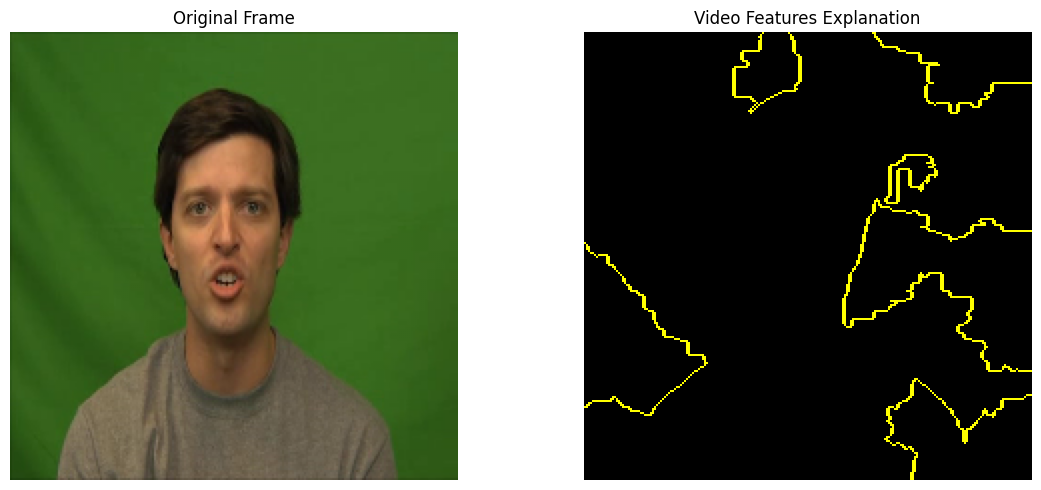


Explaining audio features...
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 921ms/step

Top audio features:
                   Feature  Importance
0  audio_feature_0 <= 0.33         0.0
1  audio_feature_1 <= 0.37         0.0
2  audio_feature_2 <= 0.40         0.0
3  audio_feature_3 <= 0.36         0.0
4  audio_feature_4 <= 0.37         0.0
5  audio_feature_5 <= 0.38         0.0
6  audio_feature_6 <= 0.41         0.0
7  audio_feature_7 <= 0.45         0.0
8  audio_feature_8 <= 0.43         0.0
9  audio_feature_9 <= 0.43         0.0


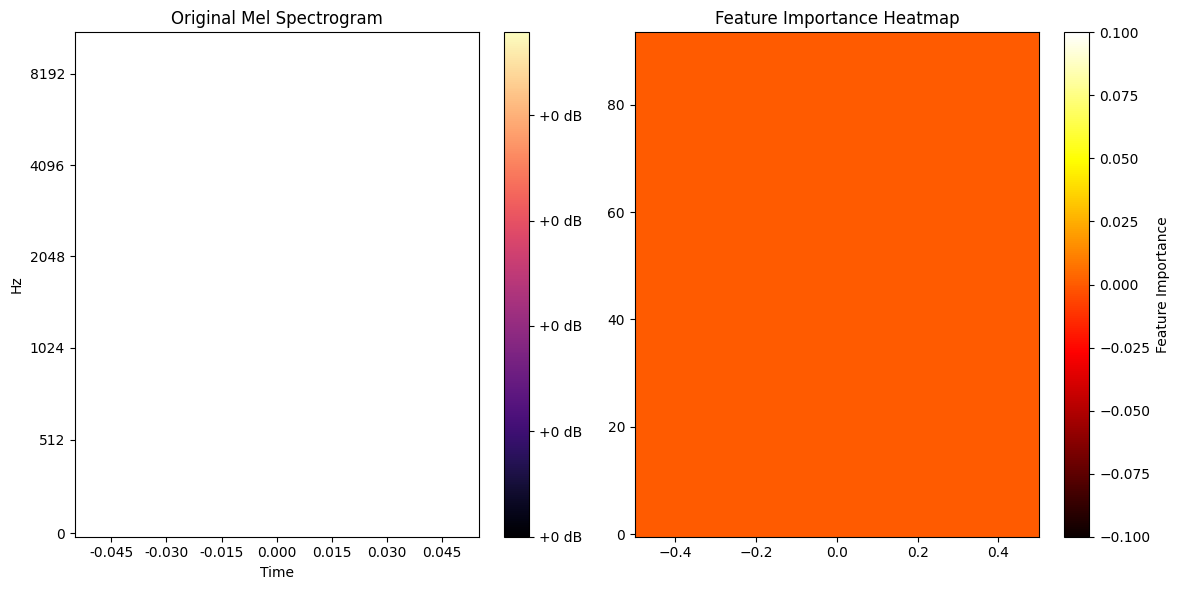



========== Explaining a non-violent sample ==========
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Sample 7:
True label: Non-violent
Predicted label: Non-violent (confidence: 0.3724)

Explaining video features...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


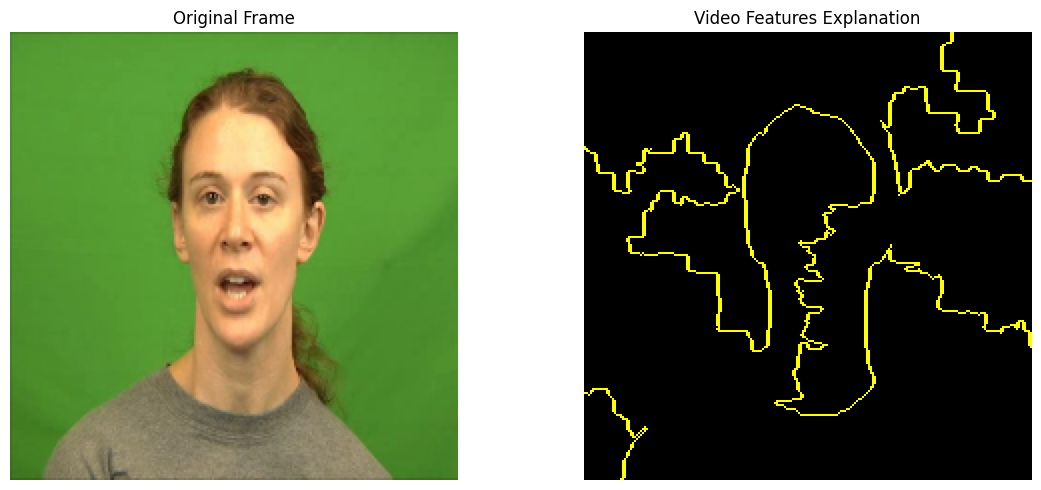


Explaining audio features...
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 943ms/step

Top audio features:
                   Feature  Importance
0  audio_feature_0 <= 0.64         0.0
1  audio_feature_1 <= 0.68         0.0
2  audio_feature_2 <= 0.72         0.0
3  audio_feature_3 <= 0.73         0.0
4  audio_feature_4 <= 0.72         0.0
5  audio_feature_5 <= 0.75         0.0
6  audio_feature_6 <= 0.73         0.0
7  audio_feature_7 <= 0.69         0.0
8  audio_feature_8 <= 0.70         0.0
9  audio_feature_9 <= 0.73         0.0


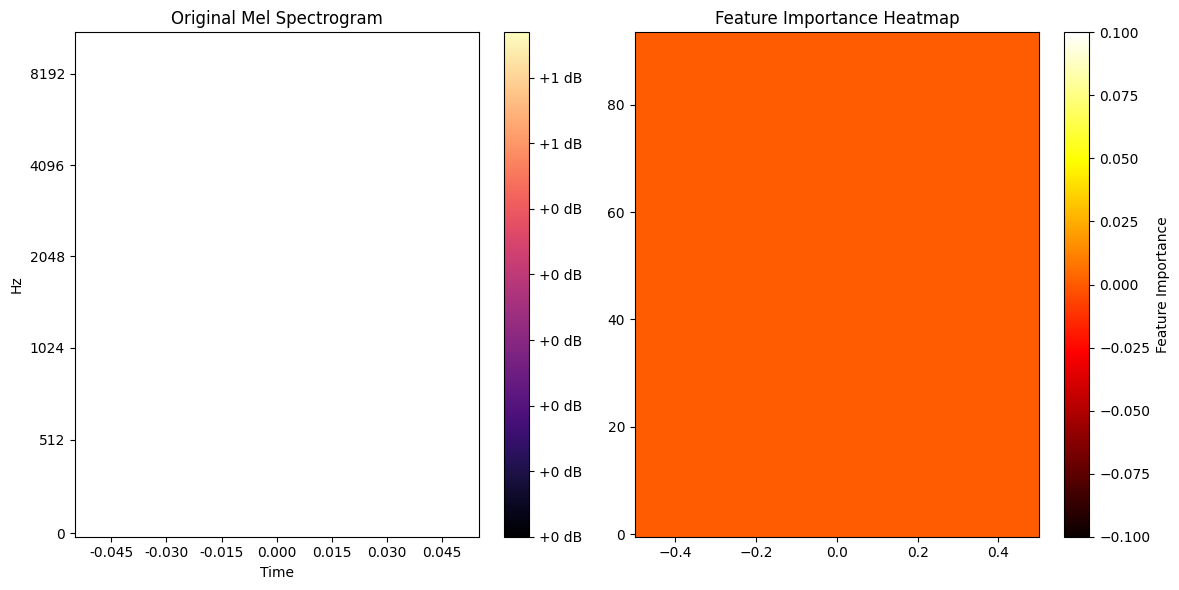

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


========== Explaining an incorrectly classified sample ==========
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Sample 6:
True label: Violent
Predicted label: Non-violent (confidence: 0.3872)

Explaining video features...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


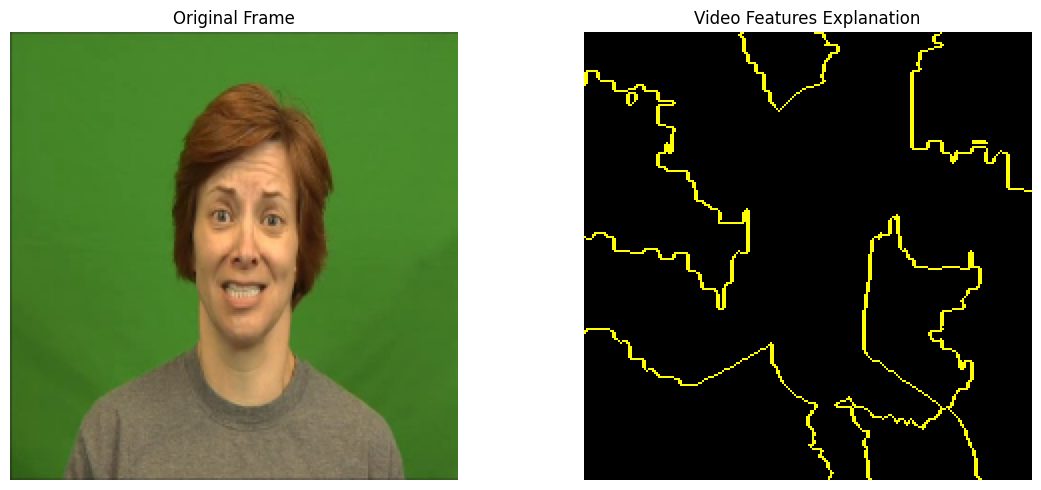


Explaining audio features...
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step

Top audio features:
                   Feature  Importance
0  audio_feature_0 <= 0.64         0.0
1  audio_feature_1 <= 0.69         0.0
2  audio_feature_2 <= 0.73         0.0
3  audio_feature_3 <= 0.73         0.0
4  audio_feature_4 <= 0.70         0.0
5  audio_feature_5 <= 0.68         0.0
6  audio_feature_6 <= 0.69         0.0
7  audio_feature_7 <= 0.69         0.0
8  audio_feature_8 <= 0.70         0.0
9  audio_feature_9 <= 0.70         0.0


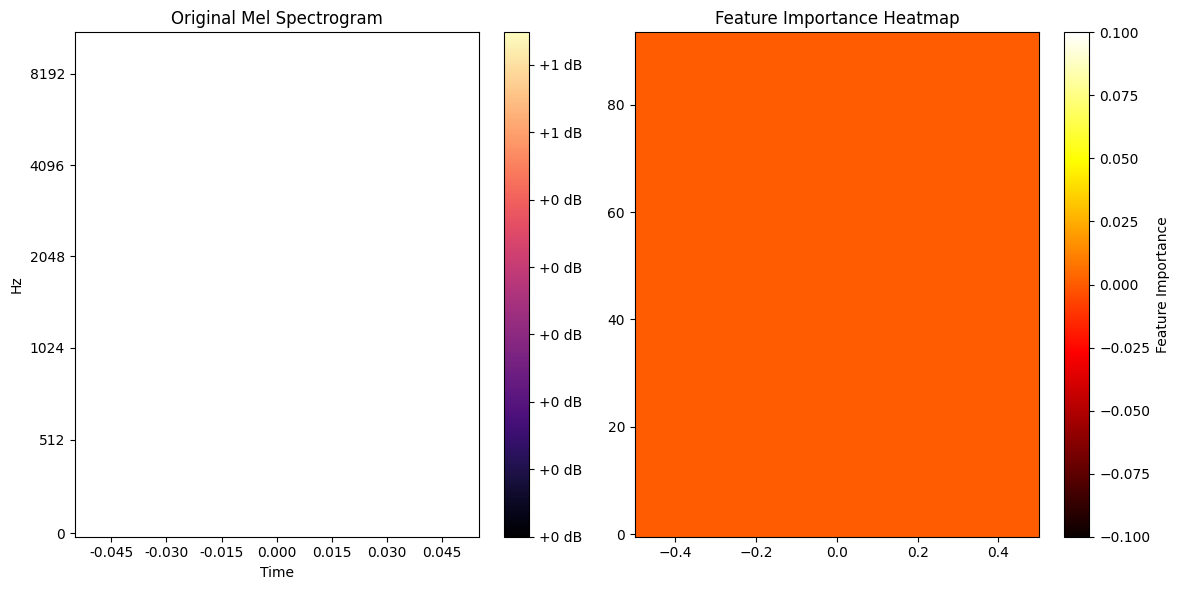


Generating explanation reports...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 934ms/step
Explanation report saved to explanation_reports/sample_8_report.html
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step
Explanation report saved to explanation_reports/sample_7_report.html
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step
Explanation report saved to explanation_reports/sample_6_report.html


In [71]:
# LIME Explainability for Multimodal Violence Detection Model
# This code helps explain predictions made by the multimodal model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image, lime_tabular
from skimage.segmentation import mark_boundaries
from sklearn.pipeline import Pipeline
import cv2
import librosa
import librosa.display
import random
import os
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model_path = 'violence_detection_model.h5'
model = load_model(model_path)

# Define the processed data directory
PROCESSED_DATA_DIR = "/content/processed_data"
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# Function to get frame from video
def get_representative_frame(video_features, frame_idx=0):
    """
    Extract a representative frame from the video features

    Args:
        video_features: Video features array (frames, height, width, channels)
        frame_idx: Index of frame to extract (default: middle frame)

    Returns:
        frame: Single frame from the video
    """
    if frame_idx == 0:
        # Get middle frame by default
        frame_idx = video_features.shape[0] // 2

    return video_features[frame_idx]

# Function to convert mel spectrogram to image for visualization
def spectrogram_to_image(mel_spec):
    """
    Convert a mel spectrogram to an RGB image for visualization

    Args:
        mel_spec: Mel spectrogram array

    Returns:
        rgb_image: RGB image representation of the spectrogram
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec[0], y_axis='mel', x_axis='time')
    plt.tight_layout()

    # Convert plot to image
    fig = plt.gcf()
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close()

    # Convert RGBA to RGB
    img_rgb = img[:, :, :3]
    return img_rgb

# Class to handle LIME explanations for the multimodal model
class MultimodalLimeExplainer:
    def __init__(self, model):
        """
        Initialize the multimodal LIME explainer

        Args:
            model: Trained multimodal model
        """
        self.model = model
        self.audio_explainer = lime_tabular.LimeTabularExplainer(
            np.zeros((1, 1)), # Will be replaced with actual data
            feature_names=['audio_feature'],
            class_names=['Non-violent', 'Violent'],
            discretize_continuous=True
        )
        self.video_explainer = lime_image.LimeImageExplainer()

    def setup_audio_explainer(self, audio_features):
        """
        Setup the audio explainer with the correct feature shape

        Args:
            audio_features: Sample audio features to determine shape
        """
        # Flatten the audio features for the tabular explainer
        flattened_shape = (audio_features.shape[0], np.prod(audio_features.shape[1:]))
        flattened_features = audio_features.reshape(flattened_shape)

        # Create feature names for all flattened dimensions
        feature_names = [f'audio_feature_{i}' for i in range(flattened_features.shape[1])]

        # Re-initialize the audio explainer with the correct shape
        self.audio_explainer = lime_tabular.LimeTabularExplainer(
            flattened_features,
            feature_names=feature_names,
            class_names=['Non-violent', 'Violent'],
            discretize_continuous=True
        )

    def predict_fn_video(self, images):
        """
        Prediction function for LIME explainer (video)

        Args:
            images: Input images to predict on

        Returns:
            predictions: Model predictions
        """
        # For each image, create a video sequence by duplicating the frame
        batch_size = images.shape[0]
        video_shape = self.video_shape

        # Create video sequences
        video_sequences = np.zeros((batch_size, video_shape[0], video_shape[1], video_shape[2], video_shape[3]))
        for i in range(batch_size):
            # Repeat the image for each frame
            for j in range(video_shape[0]):
                video_sequences[i, j] = images[i]

        # Use constant audio feature (from the original sample)
        audio_batch = np.repeat(self.audio_sample[np.newaxis, :], batch_size, axis=0)

        # Get predictions
        predictions = self.model.predict([audio_batch, video_sequences])

        # Return predictions in the format expected by LIME (probabilities for each class)
        return np.hstack([1-predictions, predictions])

    def predict_fn_audio(self, flattened_audio):
        """
        Prediction function for LIME explainer (audio)

        Args:
            flattened_audio: Flattened audio features

        Returns:
            predictions: Model predictions
        """
        # Reshape back to original audio shape
        batch_size = flattened_audio.shape[0]
        reshaped_audio = flattened_audio.reshape(batch_size, *self.audio_shape)

        # Use constant video feature (from the original sample)
        video_batch = np.repeat(self.video_sample[np.newaxis, :], batch_size, axis=0)

        # Get predictions
        predictions = self.model.predict([reshaped_audio, video_batch])

        # Return predictions in the format expected by LIME
        return np.hstack([1-predictions, predictions])

    def explain_video(self, video_features, audio_features, num_samples=100, top_labels=2):
        """
        Explain model predictions for the video modality

        Args:
            video_features: Video features array
            audio_features: Audio features array (kept constant)
            num_samples: Number of samples for LIME
            top_labels: Number of top labels to explain

        Returns:
            explanation: LIME explanation object
            highlighted_img: Image with highlighted important regions
        """
        # Store shapes for reference
        self.video_shape = video_features.shape
        self.audio_shape = audio_features.shape

        # Store the audio sample for prediction function
        self.audio_sample = audio_features

        # Get a representative frame for explanation
        frame = get_representative_frame(video_features)

        # Generate explanation
        explanation = self.video_explainer.explain_instance(
            frame,
            self.predict_fn_video,
            top_labels=top_labels,
            hide_color=0,
            num_samples=num_samples
        )

        # Get the violent class index (assuming binary classification)
        violent_class = 1

        # Get the explanation for the violent class
        temp, mask = explanation.get_image_and_mask(
            violent_class,
            positive_only=True,
            num_features=10,
            hide_rest=False
        )

        # Create highlighted image
        highlighted_img = mark_boundaries(temp / 255.0, mask)

        return explanation, highlighted_img

    def explain_audio(self, audio_features, video_features, num_features=20, num_samples=100):
        """
        Explain model predictions for the audio modality

        Args:
            audio_features: Audio features array
            video_features: Video features array (kept constant)
            num_features: Number of features to show in the explanation
            num_samples: Number of samples for LIME

        Returns:
            exp: LIME explanation object
            feature_importance: DataFrame of feature importances
        """
        # Store shapes for reference
        self.audio_shape = audio_features.shape

        # Store the video sample for prediction function
        self.video_sample = video_features

        # Setup audio explainer with correct dimensions
        self.setup_audio_explainer(np.array([audio_features]))

        # Flatten audio features
        flattened_audio = audio_features.flatten()

        # Generate explanation
        exp = self.audio_explainer.explain_instance(
            flattened_audio,
            self.predict_fn_audio,
            num_features=num_features,
            num_samples=num_samples
        )

        feature_importance_list = exp.as_list()

        # Convert the list of tuples to a pandas DataFrame
        feature_importance = pd.DataFrame(feature_importance_list, columns=['Feature', 'Importance'])

        return exp, feature_importance

    def visualize_audio_explanation(self, audio_features, explanation):
        """
        Visualize the audio explanation by highlighting important regions in the spectrogram

        Args:
            audio_features: Original audio features (mel spectrogram)
            explanation: LIME explanation object

        Returns:
            highlighted_spectrogram: Highlighted spectrogram image
        """
        # Convert mel spectrogram to image
        spec_img = spectrogram_to_image(audio_features)

        # Create a heatmap from the explanation
        # Get feature importances
        feature_weights = explanation.as_list()

        # Create a feature importance map based on positions in the flattened array
        # Create a mask with the same shape as the flattened audio features
        mask = np.zeros(np.prod(audio_features.shape))

        # Parse feature names and extract indices
        for feature, weight in feature_weights:
            # Extract only the index part from feature name (e.g., 'audio_feature_42 <= 0.5' -> '42')
            # Using regex to extract the number after 'audio_feature_'
            import re
            match = re.search(r'audio_feature_(\d+)', feature)
            if match:
                feature_idx = int(match.group(1))
                mask[feature_idx] = weight

        # Reshape the mask to match the original audio feature shape
        mask = mask.reshape(audio_features.shape)

        # Normalize the mask for visualization (avoid division by zero)
        mask_min = mask.min()
        mask_max = mask.max()
        if mask_max > mask_min:  # Avoid division by zero
            mask = (mask - mask_min) / (mask_max - mask_min)

        # Create a heatmap overlay
        plt.figure(figsize=(12, 6))

        # Plot the original spectrogram
        plt.subplot(1, 2, 1)
        librosa.display.specshow(audio_features[0], y_axis='mel', x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Original Mel Spectrogram')

        # Plot the importance heatmap
        plt.subplot(1, 2, 2)
        plt.imshow(mask[0], aspect='auto', origin='lower', cmap='hot')
        plt.colorbar(label='Feature Importance')
        plt.title('Feature Importance Heatmap')

        plt.tight_layout()
        plt.show()

# Example usage of the MultimodalLimeExplainer
def explain_sample(sample_idx, X_audio_test, X_video_test, y_test, model):
    """
    Explain a specific test sample

    Args:
        sample_idx: Index of the sample to explain
        X_audio_test: Test audio features
        X_video_test: Test video features
        y_test: Test labels
        model: Trained model
    """
    # Get the sample
    audio_sample = X_audio_test[sample_idx]
    video_sample = X_video_test[sample_idx]
    true_label = y_test[sample_idx]

    # Make prediction
    prediction = model.predict([
        audio_sample[np.newaxis, :],
        video_sample[np.newaxis, :]
    ])[0][0]

    # Convert to binary prediction
    pred_label = 1 if prediction > 0.5 else 0

    print(f"Sample {sample_idx}:")
    print(f"True label: {'Violent' if true_label == 1 else 'Non-violent'}")
    print(f"Predicted label: {'Violent' if pred_label == 1 else 'Non-violent'} (confidence: {prediction:.4f})")

    # Create explainer
    explainer = MultimodalLimeExplainer(model)

    # Explain video
    print("\nExplaining video features...")
    video_exp, video_highlighted = explainer.explain_video(video_sample, audio_sample)

    # Display original frame and explanation
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(get_representative_frame(video_sample))
    plt.title('Original Frame')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(video_highlighted)
    plt.title('Video Features Explanation')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Explain audio
    print("\nExplaining audio features...")
    audio_exp, audio_importance = explainer.explain_audio(audio_sample, video_sample)

    # Display top features
    print("\nTop audio features:")
    print(audio_importance.head(10))

    # Visualize audio explanation
    explainer.visualize_audio_explanation(audio_sample, audio_exp)

# Additional function to generate and save explanation reports
def generate_explanation_report(sample_idx, X_audio_test, X_video_test, y_test, model, output_dir="explanation_reports"):
    """
    Generate and save a detailed explanation report for a specific sample

    Args:
        sample_idx: Index of the sample to explain
        X_audio_test: Test audio features
        X_video_test: Test video features
        y_test: Test labels
        model: Trained model
        output_dir: Directory to save the reports
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Get the sample
    audio_sample = X_audio_test[sample_idx]
    video_sample = X_video_test[sample_idx]
    true_label = y_test[sample_idx]

    # Make prediction
    prediction = model.predict([
        audio_sample[np.newaxis, :],
        video_sample[np.newaxis, :]
    ])[0][0]

    # Convert to binary prediction
    pred_label = 1 if prediction > 0.5 else 0

    # Create explainer
    explainer = MultimodalLimeExplainer(model)

    # Create an HTML report
    with open(os.path.join(output_dir, f"sample_{sample_idx}_report.html"), "w") as f:
        f.write("<html><head><title>Explanation Report</title>")
        f.write("<style>body { font-family: Arial, sans-serif; margin: 20px; }</style>")
        f.write("</head><body>")
        f.write(f"<h1>Explanation Report for Sample {sample_idx}</h1>")
        f.write(f"<p><b>True label:</b> {'Violent' if true_label == 1 else 'Non-violent'}</p>")
        f.write(f"<p><b>Predicted label:</b> {'Violent' if pred_label == 1 else 'Non-violent'} (confidence: {prediction:.4f})</p>")

        # Save visualizations to files
        video_exp, video_highlighted = explainer.explain_video(video_sample, audio_sample)

        # Save original frame
        plt.figure(figsize=(6, 6))
        plt.imshow(get_representative_frame(video_sample))
        plt.title('Original Frame')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"sample_{sample_idx}_original_frame.png"))
        plt.close()

        # Save explained frame
        plt.figure(figsize=(6, 6))
        plt.imshow(video_highlighted)
        plt.title('Video Features Explanation')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"sample_{sample_idx}_video_explanation.png"))
        plt.close()

        # Add images to the report
        f.write("<h2>Video Analysis</h2>")
        f.write("<div style='display: flex; flex-direction: row;'>")
        f.write(f"<div style='margin-right: 20px;'><img src='sample_{sample_idx}_original_frame.png' width='400'><p>Original Frame</p></div>")
        f.write(f"<div><img src='sample_{sample_idx}_video_explanation.png' width='400'><p>Regions Contributing to {'Violence' if pred_label == 1 else 'Non-violence'} Prediction</p></div>")
        f.write("</div>")

        # Get audio explanation
        audio_exp, audio_importance = explainer.explain_audio(audio_sample, video_sample)

        # Save audio spectrogram visualization
        plt.figure(figsize=(12, 6))

        # Plot the original spectrogram
        plt.subplot(1, 2, 1)
        librosa.display.specshow(audio_sample[0], y_axis='mel', x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Original Mel Spectrogram')

        # Create a heatmap from the explanation
        # Get feature importances
        feature_weights = audio_exp.as_list()

        # Create a mask with the same shape as the flattened audio features
        mask = np.zeros(np.prod(audio_sample.shape))

        # Parse feature names and extract indices
        for feature, weight in feature_weights:
            import re
            match = re.search(r'audio_feature_(\d+)', feature)
            if match:
                feature_idx = int(match.group(1))
                mask[feature_idx] = weight

        # Reshape the mask to match the original audio feature shape
        mask = mask.reshape(audio_sample.shape)

        # Normalize the mask for visualization (avoid division by zero)
        mask_min = mask.min()
        mask_max = mask.max()
        if mask_max > mask_min:  # Avoid division by zero
            mask = (mask - mask_min) / (mask_max - mask_min)

        # Plot the importance heatmap
        plt.subplot(1, 2, 2)
        plt.imshow(mask[0], aspect='auto', origin='lower', cmap='hot')
        plt.colorbar(label='Feature Importance')
        plt.title('Audio Feature Importance')

        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"sample_{sample_idx}_audio_explanation.png"))
        plt.close()

        # Add audio analysis to the report
        f.write("<h2>Audio Analysis</h2>")
        f.write(f"<img src='sample_{sample_idx}_audio_explanation.png' width='800'>")

        # Add feature importance table
        f.write("<h2>Top Audio Features</h2>")
        f.write("<table border='1' cellpadding='5'>")
        f.write("<tr><th>Feature</th><th>Importance</th></tr>")

        for _, row in audio_importance.head(10).iterrows():
            f.write(f"<tr><td>{row['Feature']}</td><td>{row['Importance']:.6f}</td></tr>")

        f.write("</table>")

        f.write("</body></html>")

    print(f"Explanation report saved to {os.path.join(output_dir, f'sample_{sample_idx}_report.html')}")

# Main function to run the explanations
def run_lime_explanation():
    # Load the processed test data
    X_audio_test = np.load(os.path.join(PROCESSED_DATA_DIR, "X_audio_test.npy"))
    X_video_test = np.load(os.path.join(PROCESSED_DATA_DIR, "X_video_test.npy"))
    y_test = np.load(os.path.join(PROCESSED_DATA_DIR, "y_test.npy"))

    print(f"Loaded {len(y_test)} test samples")

    # Get indices of violent and non-violent samples
    violent_indices = np.where(y_test == 1)[0]
    nonviolent_indices = np.where(y_test == 0)[0]

    print(f"Found {len(violent_indices)} violent samples and {len(nonviolent_indices)} non-violent samples")

    # Explain samples
    samples_to_explain = []

    # Explain a random violent sample
    if len(violent_indices) > 0:
        violent_idx = np.random.choice(violent_indices)
        samples_to_explain.append(("violent", violent_idx))
        print("\n\n========== Explaining a violent sample ==========")
        explain_sample(violent_idx, X_audio_test, X_video_test, y_test, model)

    # Explain a random non-violent sample
    if len(nonviolent_indices) > 0:
        nonviolent_idx = np.random.choice(nonviolent_indices)
        samples_to_explain.append(("non-violent", nonviolent_idx))
        print("\n\n========== Explaining a non-violent sample ==========")
        explain_sample(nonviolent_idx, X_audio_test, X_video_test, y_test, model)

    # Explain incorrectly classified samples (if any)
    predictions = model.predict([X_audio_test, X_video_test])
    pred_labels = (predictions > 0.5).astype(int).flatten()
    incorrect_indices = np.where(pred_labels != y_test)[0]

    if len(incorrect_indices) > 0:
        incorrect_idx = np.random.choice(incorrect_indices)
        samples_to_explain.append(("misclassified", incorrect_idx))
        print("\n\n========== Explaining an incorrectly classified sample ==========")
        explain_sample(incorrect_idx, X_audio_test, X_video_test, y_test, model)
    else:
        print("\nNo incorrectly classified samples found in the test set")

    # Generate reports for all explained samples
    print("\nGenerating explanation reports...")
    for sample_type, idx in samples_to_explain:
        generate_explanation_report(idx, X_audio_test, X_video_test, y_test, model)

# Function to do comparative analysis of multiple samples
def compare_samples(indices, X_audio_test, X_video_test, y_test, model):
    """
    Compare and contrast explanations for multiple samples

    Args:
        indices: List of sample indices to compare
        X_audio_test, X_video_test, y_test: Test data
        model: Trained model
    """
    # Create explainer
    explainer = MultimodalLimeExplainer(model)

    # Compare video explanations
    plt.figure(figsize=(4*len(indices), 8))

    for i, idx in enumerate(indices):
        # Get the sample
        audio_sample = X_audio_test[idx]
        video_sample = X_video_test[idx]
        true_label = y_test[idx]

        # Make prediction
        prediction = model.predict([
            audio_sample[np.newaxis, :],
            video_sample[np.newaxis, :]
        ])[0][0]

        # Explain video
        _, video_highlighted = explainer.explain_video(video_sample, audio_sample)

        # Original frame
        plt.subplot(2, len(indices), i+1)
        plt.imshow(get_representative_frame(video_sample))
        plt.title(f'Sample {idx}\nTrue: {"V" if true_label==1 else "NV"}, Pred: {"V" if prediction>0.5 else "NV"} ({prediction:.2f})')
        plt.axis('off')

        # Explanation
        plt.subplot(2, len(indices), i+1+len(indices))
        plt.imshow(video_highlighted)
        plt.title('Video Explanation')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Compare audio explanations
    plt.figure(figsize=(12, 4*len(indices)))

    for i, idx in enumerate(indices):
        # Get the sample
        audio_sample = X_audio_test[idx]
        video_sample = X_video_test[idx]

        # Explain audio
        audio_exp, _ = explainer.explain_audio(audio_sample, video_sample)

        # Extract feature importances from explanation
        feature_weights = audio_exp.as_list()

        # Create a mask for visualization
        mask = np.zeros(np.prod(audio_sample.shape))

        # Parse feature names and extract indices
        for feature, weight in feature_weights:
            import re
            match = re.search(r'audio_feature_(\d+)', feature)
            if match:
                feature_idx = int(match.group(1))
                mask[feature_idx] = weight

        # Reshape the mask
        mask = mask.reshape(audio_sample.shape)

        # Normalize the mask
        mask_min = mask.min()
        mask_max = mask.max()
        if mask_max > mask_min:
            mask = (mask - mask_min) / (mask_max - mask_min)

        # Plot
        plt.subplot(len(indices), 2, 2*i+1)
        librosa.display.specshow(audio_sample[0], y_axis='mel', x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Sample {idx} - Original Spectrogram')

        plt.subplot(len(indices), 2, 2*i+2)
        plt.imshow(mask[0], aspect='auto', origin='lower', cmap='hot')
        plt.colorbar(label='Feature Importance')
        plt.title(f'Sample {idx} - Audio Importance')

    plt.tight_layout()
    plt.show()

# Run the explanations
if __name__ == "__main__":
    run_lime_explanation()

Cloning into 'XAI-project'...
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/XMostafaNashaatX/XAI-project.git'


fatal: not a git repository (or any of the parent directories): .git
